In [1]:
import os

In [2]:
os.listdir("C:\\Users\\hp\\cat and dog\\train")

['cats', 'dogs']

In [3]:
os.listdir("C:\\Users\\hp\\cat and dog\\test")

['cats', 'dogs']

In [4]:
train_dir="C:/Users/hp/cat and dog/test/"

In [5]:
test_dir="C:/Users/hp/cat and dog/test/"

In [6]:
os.listdir(train_dir)
train_cats=train_dir+"cats/"
train_dogs=train_dir+"dogs/"



In [7]:
#mild pic
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
print(len(os.listdir(train_cats)))
rand_norm=np.random.randint(0,len(os.listdir(train_cats)))
cats_pic=os.listdir(train_cats)[rand_norm]
print("cat:",cats_pic)
cats_pic_address=train_cats+cats_pic

70
cat: cat_223.jpg


In [8]:
#moderate image
rand_norm=np.random.randint(0,len(os.listdir(train_dogs)))
dogs_pic=os.listdir(train_dogs)[rand_norm]
print("dogs:",dogs_pic)

dogs: dog_442.jpg


In [9]:
#assigning address
cats=train_cats+cats_pic

In [10]:
dogs_add=train_dogs+dogs_pic

In [11]:
cats_add=train_cats+cats_pic

Text(0.5, 1.0, 'dogs')

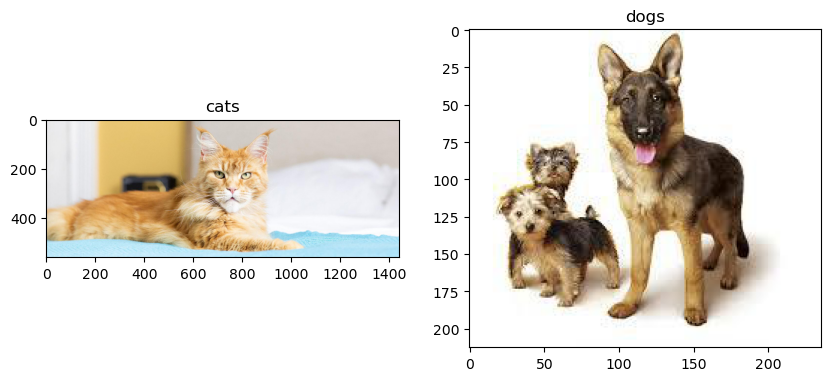

In [12]:
#plt these images
#load the images
cats_load=Image.open(cats_pic_address)
dogs_load=Image.open(dogs_add)

f=plt.figure(figsize=(10,6))
a1=f.add_subplot(1,2,1)
img_plot=plt.imshow(cats_load)
a1.set_title("cats")
a2=f.add_subplot(1,2,2)
img_plot=plt.imshow(dogs_load)
a2.set_title("dogs")


In [13]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
from sklearn.model_selection import train_test_split

train_dir = "C:/Users/hp/cat and dog/test/"
train_generator = ImageDataGenerator(
    rescale=1/255,
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

train_data = train_generator.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=4,
    shuffle=False
)

# Extract data and labels
data, labels = next(train_data)

# Split data and labels
train_data, val_data, train_labels, val_labels = train_test_split(
    data,
    labels,
    test_size=0.2,
    random_state=42
)

# Create separate generators for training and validation
train_generator = ImageDataGenerator(
    rescale=1/255,
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

train_generator.fit(train_data)
train_generator = train_generator.flow(train_data, train_labels, batch_size=4, shuffle=True)

val_generator = ImageDataGenerator(rescale=1/255)
val_generator.fit(val_data)
val_generator = val_generator.flow(val_data, val_labels, batch_size=4, shuffle=False)


Found 140 images belonging to 2 classes.


In [16]:
test_generator=ImageDataGenerator(rescale=1/255.0)
test_generator=test_generator.flow_from_directory(test_dir,target_size=(224,224,3),batch_size=12)

Found 140 images belonging to 2 classes.


In [17]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [18]:
import tensorflow as tf

print("tensorflow version {}".format(tf.__version__))


tensorflow version 2.11.0


In [19]:
from tensorflow.keras.applications import Xception
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D

In [20]:
xception=Xception(input_shape=[224,224,3],weights="imagenet",include_top=False)

In [21]:
xception.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [24]:
pip install visualkeras

Note: you may need to restart the kernel to use updated packages.


In [25]:
for layers in xception.layers[:50]:
    layers.trainable=False

In [26]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
x = Flatten()(xception.output)

In [27]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
prediction = Dense(2, activation='softmax')(x)
# create a model object
model = Model(inputs=xception.input, outputs=prediction)

In [28]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [29]:
pip install BatchNormalization

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement BatchNormalization (from versions: none)
ERROR: No matching distribution found for BatchNormalization


In [30]:
from tensorflow.keras.layers import BatchNormalization

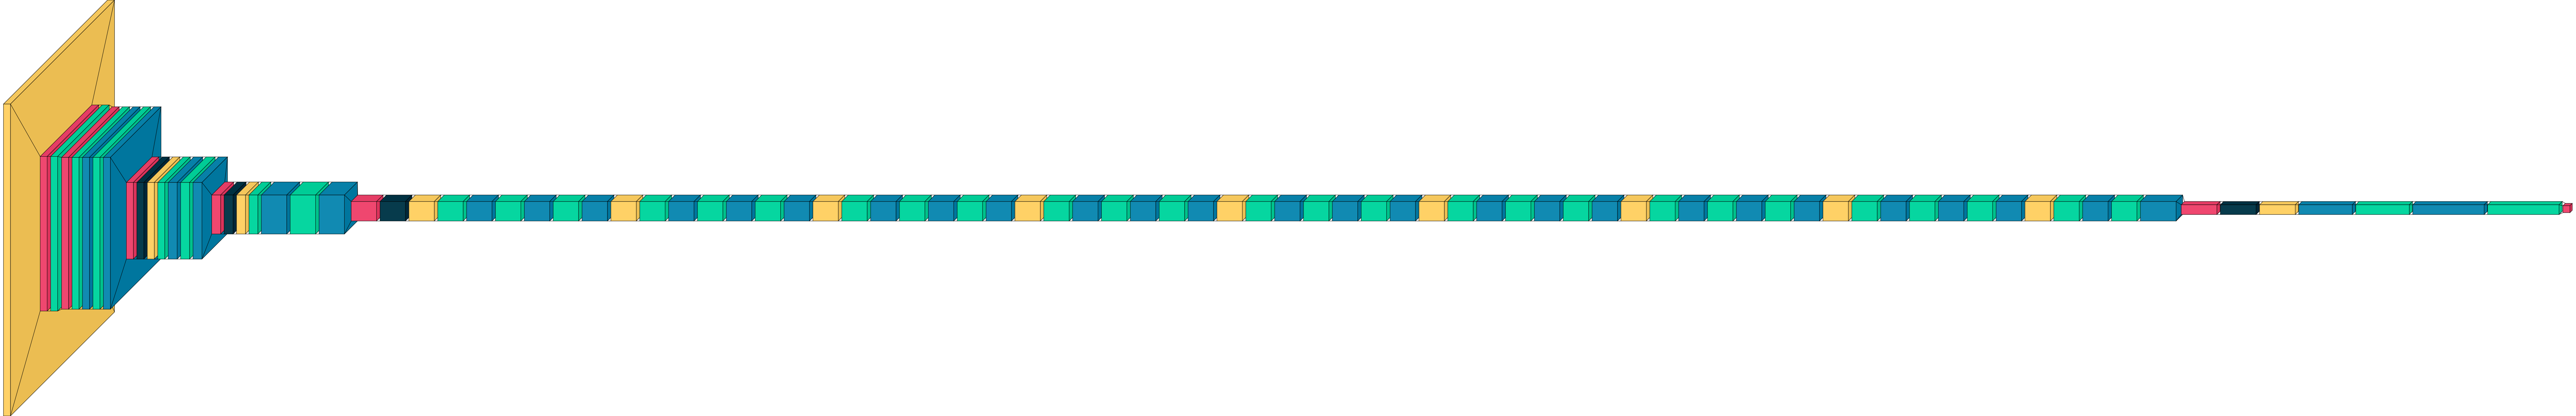

In [31]:
import visualkeras
visualkeras.layered_view(model, type_ignore=[ ZeroPadding2D,BatchNormalization,Flatten,Dropout])

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['acc'])

In [33]:
history = model.fit_generator(train_generator,validation_data = val_generator,epochs = 20, verbose = 1)

C:\Users\hp\AppData\Local\Temp\ipykernel_16632\3998390205.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,validation_data = val_generator,epochs = 20, verbose = 1)


Epoch 1/20
1/1 [==============================] - 17s 17s/step - loss: 0.8495 - acc: 0.0000e+00 - val_loss: 0.1801 - val_acc: 1.0000
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 0.0568 - acc: 1.0000 - val_loss: 0.0807 - val_acc: 1.0000
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0183 - val_acc: 1.0000
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 1.0000
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 6.8570e-04 - val_acc: 1.0000
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 2.8439e-04 - val_acc: 1.0000
Epoch 8/20
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+

In [34]:
accuracy=history.history['acc']
loss=history.history['loss']
val_accuracy=history.history['val_acc']
val_loss=history.history['val_loss']

In [35]:
epochs = range(len(accuracy))
epochs

range(0, 20)

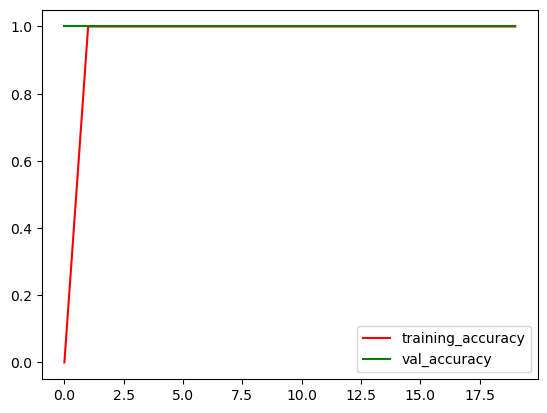

In [36]:
import matplotlib.pyplot as plt
plt.plot(epochs,accuracy,'r',label='training_accuracy')
plt.plot(epochs,val_accuracy,'g',label='val_accuracy')
plt.legend()
plt.show()

In [37]:
##2)build an CNN model on the chosen dataset

In [41]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [42]:

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

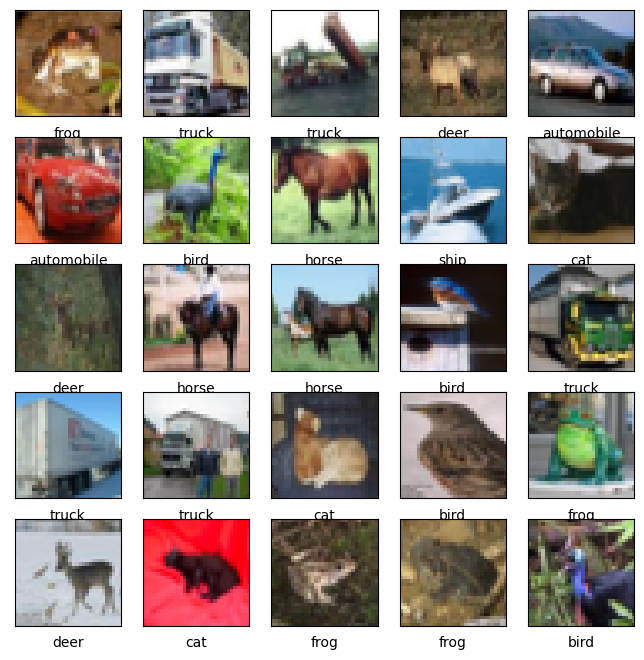

In [43]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    
    #which is why we need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()









In [44]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [46]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0

In [48]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.5142 - accuracy: 0.4488 - val_loss: 1.2362 - val_accuracy: 0.5516
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1298 - accuracy: 0.5992 - val_loss: 1.0822 - val_accuracy: 0.6161
Epoch 3/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.9869 - accuracy: 0.6525 - val_loss: 1.0000 - val_accuracy: 0.6460
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8854 - accuracy: 0.6904 - val_loss: 0.9466 - val_accuracy: 0.6741
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8152 - accuracy: 0.7157 - val_loss: 0.9016 - val_accuracy: 0.6884
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7553 - accuracy: 0.7371 - val_loss: 0.8534 - val_accuracy: 0.7089
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7042 - accuracy: 0.7540 - val_loss: 0.8609 -

313/313 - 4s - loss: 0.8659 - accuracy: 0.7182 - 4s/epoch - 14ms/step


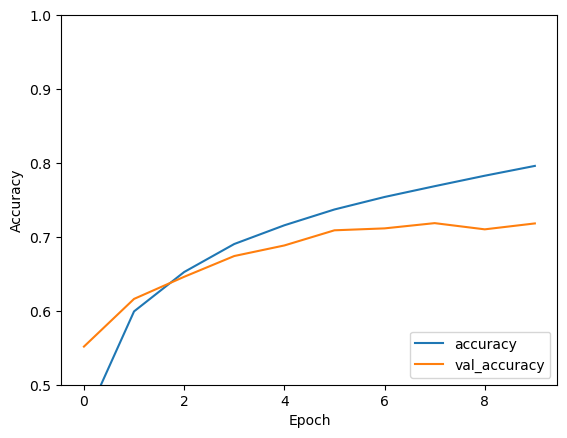

In [74]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [75]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.7182000279426575
